# Analysis of WeRateDogs Twitter

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#Gather)
- [Assessing Data](#Assess)
- [Cleaning Data](#Clean)
- [Storing Data](#store)
- [Analyzing Data](#Analyze)



<a id='intro'></a>
## Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc,WeRateDogs has over 4 million followers and has received international media coverage.
The main purpose in this project is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it , plus showcase them through analyses and visualizations 

<a id='Gather'></a>
## Gathering Data
In this project I gather data from a varity of sorces :
1. The WeRateDogs Twitter archive
2. The tweet image predictions,This file is hosted on Udacity's servers and should be downloaded programmatically 
3. Twitter API & JSON: Each tweet's retweet count and favorite ("like") count 


In [2]:
# Load all packages
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
import re 
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#Read twitter archive csv file
twitter_archeive = pd.read_csv('twitter-archive-enhanced.csv')


In [32]:
folder_name = "C:\\Users\\Ahmed Ezz\\Desktop\\Wrangle and analyze data project"

In [4]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)


In [33]:
image_prediction = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
consumer_key = 'Y6yswgPDydPmKIJeNAiFoiB1v'
consumer_secret = '5HK5Gv92YJ4Ql82x4gFUMNIvn3hK04iz5ad38BHNL09MjAXDTZ'
access_token = '1086508800398495745-J0zYjhHS45hUyFnOho3WfX0xWnuK2N'
access_token_secret = 'tkAcrrhyWuvWzhHrLmVnwlvpCIizx46k9ixYhCNkVz5cZ'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,
                wait_on_rate_limit=True,
                wait_on_rate_limit_notify=True)

In [5]:
tweets = {}
unfound_tweets = []
for tweet_id in twitter_archeive.tweet_id:
    try:
        
        tweet_status = api.get_status(tweet_id,tweet_mode='extended')
        tweets[str(tweet_id)]=tweet_status._json
        
    except Exception as e:
        unfound_tweets.append(tweet_id)     

Rate limit reached. Sleeping for: 84
Rate limit reached. Sleeping for: 156
Rate limit reached. Sleeping for: 169


In [6]:
print('The lenght of tweets:',len(tweets))
print('The lenght of unfound tweets:',len(unfound_tweets))

The lenght of tweets: 2340
The lenght of unfound tweets: 16


In [8]:
# Write tweets into a json file
with open(os.path.join(folder_name,'tweet_json.txt'), 'w') as file:
    json.dump(tweets, file)

In [34]:
# Open json file

with open(os.path.join(folder_name,'tweet_json.txt'), 'r') as json_file:
    data =  json.load(json_file)

In [35]:
tweet_dict = []
for tweet_id in data.keys():
    retweet_count = data[tweet_id]['retweet_count']
    favorite_count = data[tweet_id]['favorite_count']
    tweet_dict.append({'tweet_id':tweet_id,
                      "retweet_count":retweet_count,
                      "favorite_count":favorite_count})
    

In [36]:
tweets_df = pd.DataFrame(tweet_dict)


<a id="Assess"></a>

# Assessing Data 


#### Twitter Archive

In [17]:
twitter_archeive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [59]:
twitter_archeive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,12,10,None,None,None,None,None
1417,698549713696649216,NaN,NaN,2016-02-13 16:50:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Claude. He's trying to be seductive bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698549713...,9,10,Claude,None,None,None,None
1861,675483430902214656,NaN,NaN,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675483430...,5,10,None,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None


In [60]:
twitter_archeive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [61]:
sum(twitter_archeive.name.isnull())

0

In [62]:
sum(twitter_archeive.name=="None")

745

In [148]:
twitter_archeive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [9]:
sum(twitter_archeive.rating_numerator==0)

2

In [37]:
# Seams to be unrelated to our main subject
twitter_archeive[twitter_archeive.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [38]:
twitter_archeive[twitter_archeive.rating_numerator==0].text

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag      
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

In [16]:
print(twitter_archeive['text'][315]) # Delete unrelated twitter subject
print(twitter_archeive['text'][1016]) # Delete unrelated twitter subject

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [17]:
twitter_archeive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [18]:
# cheeck for rows have denominator greatar than 10
twitter_archeive.loc[twitter_archeive.rating_denominator > 10, 'text']

342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1663    I'm aw

In [19]:
print(twitter_archeive.text[342])  # Delete seems to be just an notification
print(twitter_archeive.text[433])  # seems to be a group of 7 doogs each one get 12/10
print(twitter_archeive.text[784])  # change to 14/10
print(twitter_archeive.text[902])  # group of dogs each one get 11/10
print(twitter_archeive.text[1068]) # change to 14/10
print(twitter_archeive.text[1120]) # group of dogs each one get 12/10
print(twitter_archeive.text[1165]) # group of dogs each one get 13/10
print(twitter_archeive.text[1202])  # change to 11/10
print(twitter_archeive.text[1228])  # group of dogs each one get 11/10
print(twitter_archeive.text[1254])   # group of dogs each one gets 10/10
print(twitter_archeive.text[1274])   # group of dogs each one get 9/10
print(twitter_archeive.text[1351])  # group of dogs each one get 12/10
print(twitter_archeive.text[1433]) # group of dogs each one get 11/10
print(twitter_archeive.text[1598])  # delete without picture
print(twitter_archeive.text[1634]) # this is the tweet correction for twitter with index 1635
print(twitter_archeive.text[1635]) # Delete this 
print(twitter_archeive.text[1662]) # change to 10/10 
print(twitter_archeive.text[1663]) # Delet just an announcement
print(twitter_archeive.text[1779]) # group of dogs 
print(twitter_archeive.text[1843]) # group of dogs

@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0

In [46]:
#Find ids for announcemen tweets
index=[342,1663]
unwanted_tweet = []
for i in index:
    unwanted_tweet.append(twitter_archeive.iloc[i,:]['tweet_id'])
unwanted_tweet

[832088576586297345, 682808988178739200]

In [48]:
# Find id for corrected tweet
twitter_archeive.iloc[1635,:]['tweet_id']

684222868335505415

In [50]:
# find tweet with no picture
twitter_archeive.iloc[1598,:]['tweet_id']

686035780142297088

In [71]:
#find tweets_id with rates to be corrected
# change to rating_numerator=14,rating_denominator=10
twitter_archeive.iloc[784]['tweet_id']

775096608509886464

In [75]:
#find tweets_id with rates to be corrected
# change to rating_numerator=14,rating_denominator=10
twitter_archeive.iloc[1068]['tweet_id']

740373189193256964

In [76]:
#find tweets_id with rates to be corrected
# change to rating_numerator=11,rating_denominator=10
twitter_archeive.iloc[1202]['tweet_id']

716439118184652801

In [74]:
#find tweets_id with rates to be corrected
# change to rating_numerator=10,rating_denominator=10
twitter_archeive.iloc[1662]['tweet_id']

682962037429899265

In [20]:
sum(twitter_archeive.tweet_id.duplicated())

0

In [19]:
sum(twitter_archeive.expanded_urls.isnull())

59

In [74]:
twitter_archeive[twitter_archeive.expanded_urls.isnull()].text

30      @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution                                                            
55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                          
64      @RealKentMurphy 14/10 confirmed                                                                                                                                      
113     @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs                                                                                                         
148     @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10                               
179     @Marc_IRL pixelated af 12/10                                                                                              

In [33]:
sum(twitter_archeive.expanded_urls.duplicated())

137

In [65]:
# All therse tweet should be deleted as they are not for dogs and it just a warning massage
twitter_archeive[twitter_archeive.text.str.contains(r'(We only rate dogs)')].text

C:\Users\Ahmed Ezz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp        
59      Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
93      I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2        
118     RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…                     
127     Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ          
131     Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t

In [10]:
# Some tweets have a decimal rating numerator
twitter_archeive[twitter_archeive.text.str.contains(r'(\d+\.\d*\/\d+)')]

C:\Users\Ahmed Ezz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


##### Image_prediction

In [8]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1844,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
1304,753294487569522689,https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,1,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True
884,698953797952008193,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,1,Italian_greyhound,0.382378,True,redbone,0.102255,True,shower_cap,0.076834,False
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True


In [13]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
sum(image_prediction.tweet_id.duplicated())

0

In [18]:
sum(image_prediction.jpg_url.duplicated())

66

In [27]:
print(sum(image_prediction.p1_conf > 1))
print(sum(image_prediction.p1_conf < 0))

0
0


In [28]:
print(sum(image_prediction.p2_conf > 1))
print(sum(image_prediction.p2_conf < 0))

0
0


In [29]:
print(sum(image_prediction.p3_conf > 1))
print(sum(image_prediction.p3_conf < 0))

0
0


##### Tweets df

In [34]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,38006,8312,892420643555336193
1,32632,6139,892177421306343426
2,24552,4065,891815181378084864
3,41354,8456,891689557279858688
4,39530,9154,891327558926688256


In [35]:
tweets_df.sample(10)

,favorite_count,retweet_count,tweet_id
1481,1933,443,692530551048294401
825,12997,4123,767191397493538821
1292,2581,682,707315916783140866
1291,3427,1146,707377100785885184
1699,1518,538,680440374763077632
536,6134,1802,805520635690676224
2296,351,175,666776908487630848
1370,23897,9949,700747788515020802
2046,1684,1135,671163268581498880
1587,2213,560,685973236358713344


In [36]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
tweet_id          2340 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [37]:
tweets_df.tail()

,favorite_count,retweet_count,tweet_id
2335,106,41,666049248165822465
2336,292,139,666044226329800704
2337,123,43,666033412701032449
2338,126,47,666029285002620928
2339,2531,501,666020888022790149


In [38]:
sum(tweets_df.tweet_id.duplicated())

0

In [42]:
tweets_df.favorite_count.value_counts()

0        167
2693       4
745        4
1132       3
2269       3
330        3
305        3
2764       3
448        3
2480       3
2551       3
1445       3
2251       3
469        3
2056       3
2861       3
240        3
164        3
3536       2
446        2
965        2
8447       2
3553       2
379        2
1494       2
3564       2
255        2
1474       2
1868       2
2543       2
        ... 
14986      1
10822      1
2660       1
12871      1
585        1
37451      1
8783       1
5539       1
21073      1
12883      1
55894      1
6485       1
1521       1
609        1
23138      1
617        1
4745       1
39530      1
2144       1
6766       1
3414       1
2776       1
19060      1
4725       1
6776       1
12923      1
2684       1
4643       1
64132      1
3144       1
Name: favorite_count, Length: 2005, dtype: int64

#### Tidness:
1. All tables  should be one table not three
2. doggo,floofer,pupper and puppo should be in one column dog_stage
3. Condense prediction columns into two 

##### Quality

##### Twitter Archive
1. Text is not fully displayed
2. Erroneous data types (tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,timestamp).
3. Wrong rating , rating for group of dogs with denominator larger than 10 and float is not shown
4. missing dog_stage and None instead of null
5. Wrong dogs name 
6. None instead of nan in dogs name
7. Two data in twitter archeive table has 0 rating numerator with unrelated subject ids(835152434251116546,746906459439529985) 
8. Some twitter is just announcement (832088576586297345, 682808988178739200) 
9. tweet with id  684222868335505415 is modified with another tweet
10. Some tweets are not for dogs rating and they only warning massage
11. 59 twitter without jpg-url should be deleted

##### image_prediction
1. There is 281 missing tweet between image-prediction and tweet archieve
2. twitter id is integr not string 
3. 66 duplicated images should be deleted
#####  tweets_df
1. there is 16 missing tweets between tweets_df and tweet archieve




<a id= Clean></a>

## Cleaning Data

In [180]:
twitter_archeive_copy = twitter_archeive.copy()
image_prediction_copy = image_prediction.copy()
tweets_df_copy = tweets_df.copy()

### Tidness Issue

##### Define
*Merge three Table into one*

##### Code

In [181]:
# First convert tweet_id to string in twitter_archeive to match tweet table
twitter_archeive_copy.tweet_id = twitter_archeive_copy.tweet_id.astype(str)
image_prediction_copy.tweet_id = image_prediction_copy.tweet_id.astype(str)

In [182]:
twitter_archeive_copy = twitter_archeive_copy.merge(tweets_df_copy,on = "tweet_id")
twitter_archeive_copy = twitter_archeive_copy.merge(image_prediction_copy,on = "tweet_id")

##### Test

In [183]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
favorite_count                2067

##### Define
*Extract doggo,floofer,pupper, puppo  from text and assigned to new column called dog_stage and delete all other four columns.Finally convert dog stage into category data type.*

##### Code

In [184]:
twitter_archeive_copy['dog_stage'] = twitter_archeive_copy.text.str.extract('(doggo|floofer|pupper|puppo)',expand=True)

In [185]:
twitter_archeive_copy = twitter_archeive_copy.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [186]:
# Convert dog stage into category type
twitter_archeive_copy.dog_stage = twitter_archeive_copy.dog_stage.astype('category')

##### Test

In [187]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 27 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
favorite_count                2067 non-null int64
retweet_count                 2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
p1                            2067 no

In [188]:
twitter_archeive_copy.dog_stage.value_counts()

pupper     231
doggo      75 
puppo      29 
floofer    3  
Name: dog_stage, dtype: int64

#### Define
*Condese all four prediction columns into two(Prediction_type,confidence_level)then assigned to our data frame.*

In [189]:
prediction_type = []
confidence_level = []
def dog_type(df):
    if df['p1_dog']==True:
        prediction_type.append(df.p1)
        confidence_level.append(df.p1_conf)
    elif df['p2_dog']==True:
        prediction_type.append(df.p2)
        confidence_level.append(df.p2_conf)
    elif df['p3_dog']==True:
        prediction_type.append(df.p3)
        confidence_level.append(df.p3_conf)
    else:
        prediction_type.append('None')
        confidence_level.append('None')

twitter_archeive_copy.apply(dog_type,axis=1)
twitter_archeive_copy['dog_type']= prediction_type
twitter_archeive_copy['confidence_level'] = confidence_level


In [190]:

twitter_archeive_copy = twitter_archeive_copy.drop(['p1','p1_conf','p2','p2_conf','p1_dog','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [227]:
twitter_archeive_copy.dog_type=twitter_archeive_copy.dog_type.replace('None',np.nan)
twitter_archeive_copy.confidence_level=twitter_archeive_copy.confidence_level.replace('None',np.nan)

In [228]:
twitter_archeive_copy[twitter_archeive_copy.dog_type=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


In [230]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id                      1955 non-null object
in_reply_to_status_id         1955 non-null object
in_reply_to_user_id           1955 non-null object
timestamp                     1955 non-null datetime64[ns]
source                        1955 non-null object
text                          1955 non-null object
retweeted_status_id           1955 non-null object
retweeted_status_user_id      1955 non-null object
retweeted_status_timestamp    14 non-null datetime64[ns]
expanded_urls                 1955 non-null object
rating_numerator              1955 non-null int64
rating_denominator            1955 non-null int64
name                          1348 non-null object
favorite_count                1955 non-null int64
retweet_count                 1955 non-null int64
jpg_url                       1955 non-null object
img_num                       1955 non-null int64
dog_stage        

#### Test

In [191]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 20 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
favorite_count                2067 non-null int64
retweet_count                 2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
dog_stage                     338 non

### Quality Issue

##### Define
*Full text doesn't appear

##### Code

In [192]:
pd.set_option('display.max_colwidth',1)

##### Test

In [193]:
twitter_archeive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,38006,8312,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,32632,6139,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,24552,4065,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,41354,8456,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,39530,9154,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712


##### Define
*Erroneous data types.*

##### Code

In [194]:
twitter_archeive_copy.retweeted_status_id = twitter_archeive_copy.retweeted_status_id.astype(str)
twitter_archeive_copy.retweeted_status_user_id = twitter_archeive_copy.retweeted_status_user_id.astype(str)
twitter_archeive_copy.in_reply_to_status_id = twitter_archeive_copy.in_reply_to_status_id.astype(str)
twitter_archeive_copy.in_reply_to_user_id = twitter_archeive_copy.in_reply_to_user_id.astype(str)
twitter_archeive_copy.timestamp = pd.to_datetime(twitter_archeive_copy.timestamp)
twitter_archeive_copy.retweeted_status_timestamp = pd.to_datetime(twitter_archeive_copy.retweeted_status_timestamp)

In [195]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 20 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null datetime64[ns]
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
favorite_count                2067 non-null int64
retweet_count                 2067 non-null int64
jpg_url                       2067 non-null object
img_num                       2067 non-null int64
dog_stage        

#### Define
*Re extract rating from text and create dogs_number column and drop denominator.*

#### Code

In [199]:
rates = []

extract_rates = lambda x: rates.append(re.findall(r'(\d+\.\d+|\d+)\/(\d+0)', x, flags=0))

twitter_archeive_copy['text'].apply(extract_rates)

numerator = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog
    if len(item) == 0:
        dog_count.append(1)
        numerator.append('NaN')
        
    elif len(item)==1:
        dog_count.append(float(rate[0][-1])/10.0)
        numerator.append(float(item[0][0]) / (float(item[0][-1]) / 10))
        
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        list = []
        for i in range(len(item)):
            
            list.append(item[i])
        for rate in list:
            total = total + float(rate[0])
        avg = total / len(item)
        numerator.append(avg)
        dog_count.append(len(item))
        

twitter_archeive_copy['rating'] = numerator # not need to also add denominator since they are all 10!
twitter_archeive_copy['dog_count'] = dog_count
twitter_archeive_copy['rating'].value_counts()


12.0                 475
10.0                 420
11.0                 416
13.0                 280
9.0                  152
8.0                  94 
7.0                  52 
14.0                 39 
6.0                  32 
5.0                  31 
3.0                  19 
4.0                  14 
2.0                  9  
8.5                  5  
1.0                  4  
7.5                  3  
9.5                  3  
10.5                 2  
11.5                 2  
0.0                  2  
9.75                 1  
1776.0               1  
15.0                 1  
9.666666666666666    1  
30.5                 1  
4.5                  1  
5.5                  1  
6.5                  1  
13.5                 1  
420.0                1  
11.27                1  
NaN                  1  
11.26                1  
Name: rating, dtype: int64

##### Define
*Re extract dogs name from text where name is lower and text contain named or name is.*

##### Code

In [200]:

df_contain_named = twitter_archeive_copy.loc[(twitter_archeive_copy.name.str.islower())&(twitter_archeive_copy.text.str.contains('named'))]
df_contain_name_is = twitter_archeive_copy.loc[(twitter_archeive_copy.name.str.islower())&(twitter_archeive_copy.text.str.contains('name is'))]
non_name = twitter_archeive_copy.loc[twitter_archeive_copy.name.str.islower()]
# create list
df_contain_named_list = df_contain_named.text.tolist()
df_contain_name_is_list = df_contain_name_is.text.tolist()
non_name_list = non_name.text.tolist()

for text in df_contain_named_list:
    twitter_archeive_copy.loc[twitter_archeive_copy.text == text, 'name'] = re.findall(r"named\s\w+", text)

for text in df_contain_name_is_list:
    twitter_archeive_copy.loc[twitter_archeive_copy.text == text, 'name'] = re.findall(r"name is\s\w+", text)
for text in non_name_list:
    twitter_archeive_copy.loc[twitter_archeive_copy.text == text, 'name'] ='None'


##### Test

In [201]:
twitter_archeive_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey'

##### Define
*None value in dogs name instead of nan.*

##### Code

In [202]:
twitter_archeive_copy.name = twitter_archeive_copy.name.replace('None',np.nan)

##### Test

In [203]:
twitter_archeive_copy.name.value_counts()

Lucy           10
Penny          10
Tucker         10
Cooper         10
Charlie        10
Oliver         10
Sadie          8 
Bo             8 
Winston        8 
Lola           8 
Daisy          7 
Toby           7 
Rusty          6 
Jax            6 
Dave           6 
Scout          6 
Bella          6 
Koda           6 
Milo           6 
Stanley        6 
Bailey         6 
Oscar          5 
Larry          5 
Chester        5 
Alfie          5 
Leo            5 
Buddy          5 
Louis          5 
Jack           4 
George         4 
              .. 
Maisey         1 
Ozzie          1 
Taco           1 
Stephanus      1 
Dug            1 
Tove           1 
Timber         1 
Chase          1 
Jazz           1 
Traviss        1 
Nico           1 
Tyrus          1 
Brooks         1 
Shakespeare    1 
Zeek           1 
Karll          1 
Adele          1 
Alfy           1 
Jeffrie        1 
Beemo          1 
Rorie          1 
Mark           1 
Bilbo          1 
Josep          1 
Lambeau   

##### Define
* Delete tweets with zero rating numerator.*

##### Code

In [205]:
zero_numerator = ['835152434251116546','746906459439529985']
for i in zero_numerator:
    twitter_archeive_copy=twitter_archeive_copy[twitter_archeive_copy.tweet_id != i]

##### Test

In [206]:
twitter_archeive_copy[twitter_archeive_copy.tweet_id=='835152434251116546']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


In [207]:
twitter_archeive_copy[twitter_archeive_copy.tweet_id=='746906459439529985']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


##### Define
*Delete announcment tweets.*

##### Code

In [210]:
announcment_tweet = ['832088576586297345','682808988178739200']
for i in announcment_tweet:
    twitter_archeive_copy=twitter_archeive_copy[twitter_archeive_copy.tweet_id != i]

##### Test

In [211]:
twitter_archeive_copy[twitter_archeive_copy.tweet_id == '832088576586297345']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


In [212]:
twitter_archeive_copy[twitter_archeive_copy.tweet_id == '682808988178739200']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


##### Define
*Delete modefied tweet.*

##### Code

In [214]:
twitter_archeive_copy=twitter_archeive_copy[twitter_archeive_copy.tweet_id != '684222868335505415']

##### Test

In [215]:
twitter_archeive_copy[twitter_archeive_copy.tweet_id == '684222868335505415']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


##### Define
*Delete unrelated to dogs tweets.*

##### Code

In [216]:
notdogs_tweets = twitter_archeive_copy[twitter_archeive_copy.text.str.contains(r'(We only rate dogs)')].tweet_id.tolist()


C:\Users\Ahmed Ezz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [217]:
for i in notdogs_tweets:
    twitter_archeive_copy=twitter_archeive_copy[twitter_archeive_copy.tweet_id != i]

In [218]:
twitter_archeive_copy[twitter_archeive_copy.text.str.contains(r'(We only rate dogs)')]

C:\Users\Ahmed Ezz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


##### Define
*Delete tweets without picture.*

In [219]:
no_picture_tweet = twitter_archeive_copy[twitter_archeive_copy.expanded_urls.isnull()].tweet_id.tolist()
for i in no_picture_tweet:
    twitter_archeive_copy=twitter_archeive_copy[twitter_archeive_copy.tweet_id != i]

In [220]:
twitter_archeive_copy[twitter_archeive_copy.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,favorite_count,retweet_count,jpg_url,img_num,dog_stage,dog_type,confidence_level,rating,dog_count


##### Define
*Duplicate picture.*

In [221]:
sum(twitter_archeive_copy.jpg_url.duplicated())

58

##### Code

In [222]:
twitter_archeive_copy.drop_duplicates('jpg_url',keep='last',inplace=True)

##### Test

In [223]:
sum(twitter_archeive_copy.jpg_url.duplicated())

0

In [224]:
twitter_archeive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1955 entries, 0 to 2066
Data columns (total 22 columns):
tweet_id                      1955 non-null object
in_reply_to_status_id         1955 non-null object
in_reply_to_user_id           1955 non-null object
timestamp                     1955 non-null datetime64[ns]
source                        1955 non-null object
text                          1955 non-null object
retweeted_status_id           1955 non-null object
retweeted_status_user_id      1955 non-null object
retweeted_status_timestamp    14 non-null datetime64[ns]
expanded_urls                 1955 non-null object
rating_numerator              1955 non-null int64
rating_denominator            1955 non-null int64
name                          1348 non-null object
favorite_count                1955 non-null int64
retweet_count                 1955 non-null int64
jpg_url                       1955 non-null object
img_num                       1955 non-null int64
dog_stage        

<a id='store'></a>
## Storing Data

In [231]:
 twitter_archeive_copy.to_csv('twitter_archive_master.csv',index=False,encoding = 'utf-8')

In [3]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp']=pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1955 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 21 columns):
tweet_id                      1955 non-null int64
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
source                        1955 non-null object
text                          1955 non-null object
retweeted_status_id           14 non-null float64
retweeted_status_user_id      14 non-null float64
retweeted_status_timestamp    14 non-null object
expanded_urls                 1955 non-null object
rating_numerator              1955 non-null int64
rating_denominator            1955 non-null int64
name                          1348 non-null object
favorite_count                1955 non-null int64
retweet_count                 1955 non-null int64
jpg_url                       1955 non-null object
img_num                       1955 non-null int64
dog_stage                     328 non-null object
dog

<a id=Analyze></a>
## Analyzing Data

### Insight 2
What is most populat dogs breed o=in our data set?
Golden Retrievers are the most popular breed on the WeRateDogs Twitter feed, followed by Pembrokes and Labrador Retrievers.

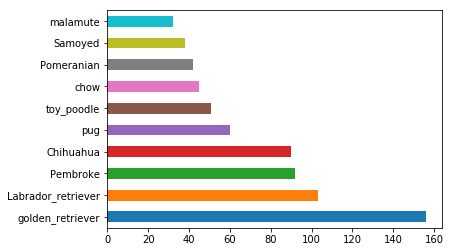

In [8]:
df['dog_type'].value_counts().head(10).plot(kind='barh')


### Insight 2

*What is the top 10 dogs rating.*

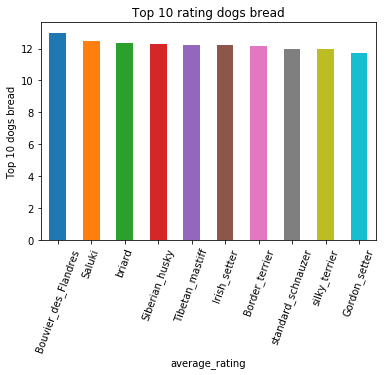

In [235]:
df.groupby('dog_type').rating.mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('average_rating')
plt.ylabel('Top 10 dogs bread')
plt.title('Top 10 rating dogs bread')
plt.xticks(rotation=70)


### Insight 3
What is the lowest rating dog bread ?Japanese_spaniel has the lowest rating.

In [236]:
df.groupby('dog_type').rating.mean().sort_values(ascending=False).tail(1)

dog_type
Japanese_spaniel    5.0
Name: rating, dtype: float64

### Insight 4
What is distribution of retweet and favorite for each dogs stage

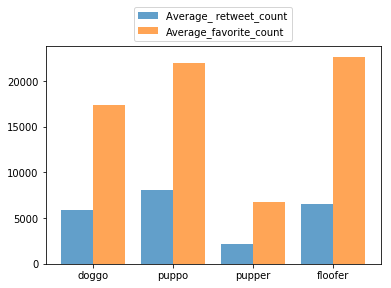

In [237]:
width=0.4
retweet_mean = df.groupby('dog_stage').retweet_count.mean()
favorite_mean = df.groupby('dog_stage').favorite_count.mean()
x_axis = np.arange(4)
plt.bar(x_axis,retweet_mean,width,alpha=.7,label='Average_ retweet_count')
plt.bar(x_axis+width,favorite_mean,width,alpha=.7,label='Average_favorite_count')
plt.xticks(x_axis+width/2,['doggo','puppo','pupper','floofer'])
plt.legend(bbox_to_anchor=(0.25,1),
           loc='lower left')
plt.show()

### Insight 4
Does higher ratings leads to higher retweets? There is low relationship between retweets count and raing

(0, 20)

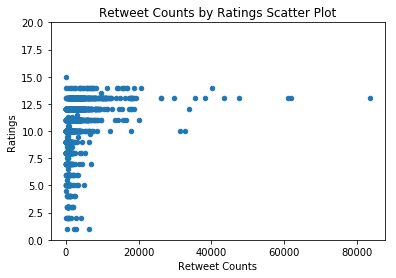

In [242]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.title('Retweet Counts by Ratings Scatter Plot')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.ylim([0,20])

In [243]:
df.retweet_count.corr(df.rating)

0.02284791547094191

### Insight 5
Does higher ratings leads to higher favorite count? For below graph and correlation coefficient there is low relationship between favorite count and rating 

(0, 20)

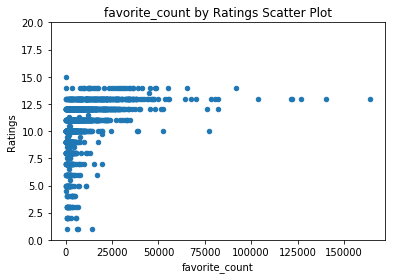

In [244]:

df.plot(x='favorite_count', y='rating', kind='scatter')
plt.title('favorite_count by Ratings Scatter Plot')
plt.xlabel('favorite_count')
plt.ylabel('Ratings')
plt.ylim([0,20])

In [245]:
df.favorite_count.corr(df.rating)

0.022058010947583317

### Insight 6
There is a clear positive relation betwen retweet and favorite acount

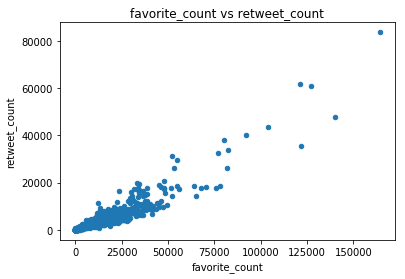

In [246]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter')
plt.title('favorite_count vs retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')



In [247]:
df.favorite_count.corr(df.retweet_count)

0.9293400740716548

### Insight 7
There is no clear relationshio between rating and the number of dogs in the picture

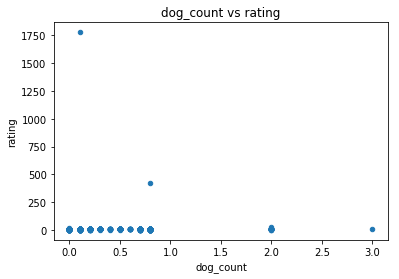

In [249]:
df.plot(x='dog_count', y='rating', kind='scatter')
plt.title('dog_count vs rating')
plt.xlabel('dog_count')
plt.ylabel('rating')


In [251]:
df.rating.corr(df.dog_count)

-0.01653321078463878

### Insight 8
Question:What is the trend for retweets and favorite over time ?
Here you can see the gradual incline of both favorites and retweets.

Text(0, 0.5, 'Count')

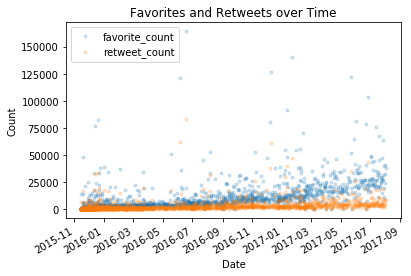

In [7]:
df[['favorite_count', 'retweet_count']].plot(style = '.', alpha = .2)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')